In [1]:
import pandas as pd
import seaborn as sn
import numpy as np

In [2]:
data = pd.read_csv('test.csv')

In [3]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [4]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


In [5]:
data.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [6]:
data2 = pd.read_csv('train.csv')

In [7]:
data2.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


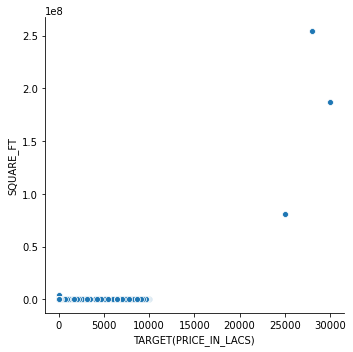

In [8]:
sn.relplot(x='TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', data = data2)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
train = data2.drop(['TARGET(PRICE_IN_LACS)', 'POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE','LATITUDE', 'BHK_OR_RK'], axis = 1)
test = data2['TARGET(PRICE_IN_LACS)']
print(train)

       BHK_NO.    SQUARE_FT
0            2  1300.236407
1            2  1275.000000
2            2   933.159722
3            2   929.921143
4            2   999.009247
...        ...          ...
29446        3  2500.000000
29447        2   769.230769
29448        2  1022.641509
29449        2   927.079009
29450        2   896.774194

[29451 rows x 2 columns]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state=2)


In [12]:
regr = LinearRegression()


In [13]:
regr.fit(x_train, y_train)

LinearRegression()

In [14]:
pre = regr.predict(x_test)

In [15]:
pre

array([109.8872537 , 187.69433321, 187.65753554, ..., 265.70566281,
       187.69282201, 187.76265216])

In [16]:
regr.score(x_test, y_test)

0.1271331760098554